In [52]:
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [27]:
data = dd.read_parquet('./FE3/unified_corr0.5_1645.pqt')

In [2]:
results = pd.read_pickle('./temp/submission-01-15-20-50.pkl')

In [7]:
results['oof'].shape

(196056, 1)

In [5]:
initial_data = pd.read_pickle('./FE/initial_data.pkl')
pos_idx = initial_data[initial_data['goal1']==1].index
neg_idx = initial_data[initial_data['goal1']==0].index

In [6]:
train = initial_data[initial_data.goal1>=0]

In [12]:
train['oof'] = results['oof'][:,0]

c:\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


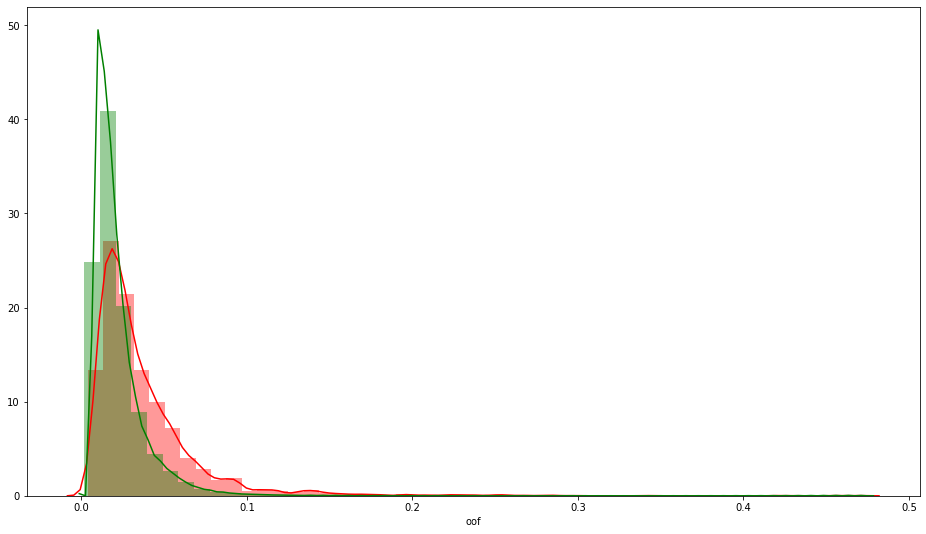

In [17]:
plt.figure(figsize=(16,9))
# sns.scatterplot(x='oof', y='goal1', data=train)
sns.distplot(train.loc[pos_idx,'oof'],bins=50,color='red')
sns.distplot(train.loc[neg_idx, 'oof'],bins=50,color='green')

In [30]:
train['oof_qcut'] = pd.qcut(train['oof'],50, retbins=True, duplicates='drop',precision=3)[0]

c:\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


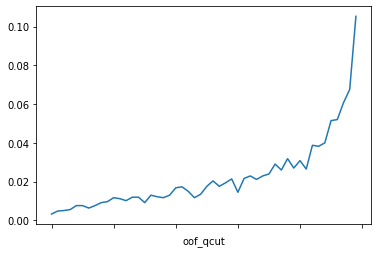

In [31]:
train.groupby('oof_qcut')['goal1'].agg('mean').plot()

In [46]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(train.goal1, train.oof)

In [64]:
from scipy.ndimage import gaussian_filter
dtpr = gaussian_filter(np.diff(tpr),sigma=500)

In [56]:
dtpr

array([0.        , 0.00023036, 0.        , ..., 0.        , 0.00023036,
       0.        ])

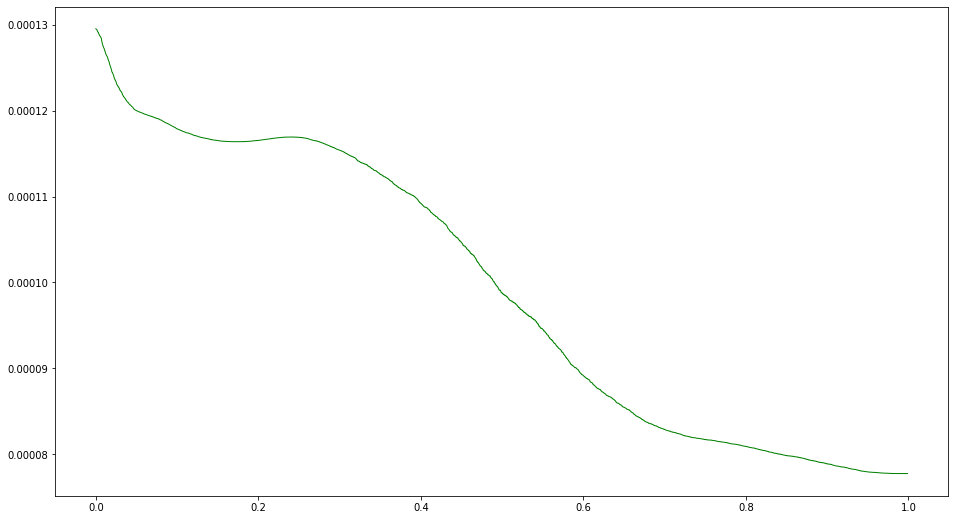

In [67]:
plt.figure(figsize=(16,9))
# plt.plot(fpr, tpr, color='darkorange',         lw=1)
plt.plot(fpr[:-1], dtpr, color='green',         lw=1)

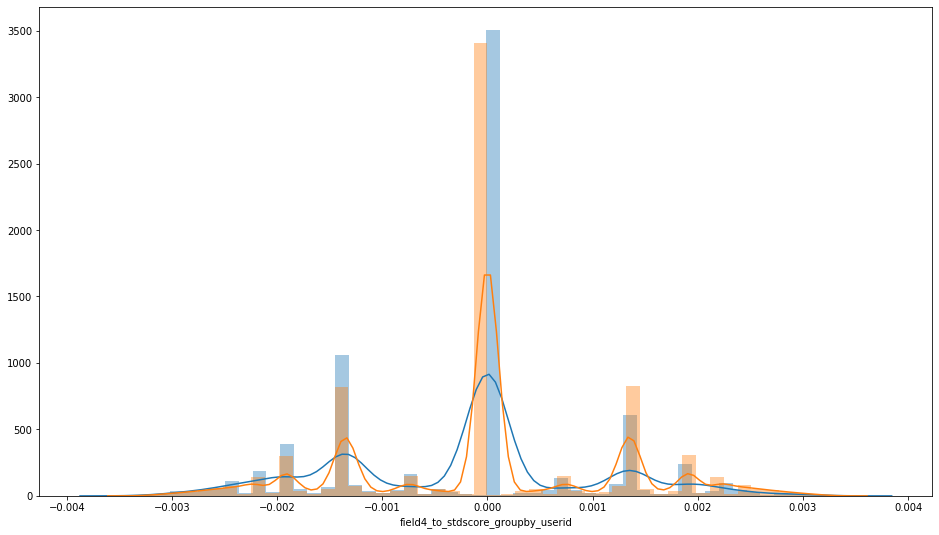

In [37]:
f = data['field4_to_stdscore_groupby_userid'].compute()
df = pd.DataFrame(index=initial_data[initial_data.goal1>=0].index)
df['goal'] = initial_data.goal1
df['feature'] = f
plt.figure(figsize=(16,9))
# sns.scatterplot(x='feature', y='goal', data=df)
sns.distplot(f.loc[pos_idx],bins=50)
sns.distplot(f.loc[neg_idx],bins=50)
# plt.yscale('log')

In [ ]:
f = data['field4_to_stdscore_groupby_userid'].compute()
df = pd.DataFrame(index=initial_data[initial_data.goal1>=0].index)
df['goal'] = initial_data.goal1
df['feature'] = f
plt.figure(figsize=(16,9))
# sns.scatterplot(x='feature', y='goal', data=df)
sns.distplot(f.loc[pos_idx],bins=50)
sns.distplot(f.loc[neg_idx],bins=50)
# plt.yscale('log')